In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [66]:
df_train = pd.read_csv('./data/house_train.csv')
df_test = pd.read_csv('./data/house_test.csv')

In [67]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [68]:
df_1 = df_train.dropna(thresh=800, axis=1)
df_2 = df_test.dropna(thresh=800, axis=1)
len(df_1.columns)

75

In [69]:
df_1.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
WoodDeckSF        0
PavedDrive        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
dtype: int64

In [70]:
df_1 = pd.get_dummies(df_1)
df_2 = pd.get_dummies(df_2)
df_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [71]:
df_1 = df_1.fillna(df_1.mean())
df_2 = df_2.fillna(df_2.mean())
df_1.isnull().sum().sort_values(ascending=False).head(20)

Id                   0
BsmtCond_Po          0
ExterCond_Po         0
ExterCond_TA         0
Foundation_BrkTil    0
Foundation_CBlock    0
Foundation_PConc     0
Foundation_Slab      0
Foundation_Stone     0
Foundation_Wood      0
BsmtQual_Ex          0
BsmtQual_Fa          0
BsmtQual_Gd          0
BsmtQual_TA          0
BsmtCond_Fa          0
BsmtCond_Gd          0
BsmtCond_TA          0
ExterCond_Fa         0
BsmtExposure_Av      0
BsmtExposure_Gd      0
dtype: int64

In [72]:
df_corr = df_1.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [73]:
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

X_train = df_1[cols_train]
X_test = df_2[cols_train]
y = df_1['SalePrice'].values

In [74]:
# # MLP 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(40,  activation='relu'))
model.add(Dense(1))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                60        
                                                                 
 dense_37 (Dense)            (None, 30)                330       
                                                                 
 dense_38 (Dense)            (None, 40)                1240      
                                                                 
 dense_39 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [75]:
# 모델 컴파일 및 학습
model.compile(loss='mse', optimizer='adam')

# 중단점, 수행시 모델 저장
stoping = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model2/house2.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y, epochs=2000, batch_size=32, validation_split=0.25, verbose=1, callbacks=[stoping, checkpointer])

Epoch 1/2000
35/35 [==============================] - 1s 9ms/step - loss: 39200956416.0000 - val_loss: 38253785088.0000
Epoch 2/2000
35/35 [==============================] - 0s 4ms/step - loss: 38887194624.0000 - val_loss: 37637201920.0000
Epoch 3/2000
35/35 [==============================] - 0s 4ms/step - loss: 37516767232.0000 - val_loss: 35007094784.0000
Epoch 4/2000
35/35 [==============================] - 0s 3ms/step - loss: 32619462656.0000 - val_loss: 27007520768.0000
Epoch 5/2000
35/35 [==============================] - 0s 3ms/step - loss: 21239091200.0000 - val_loss: 12838845440.0000
Epoch 6/2000
35/35 [==============================] - 0s 3ms/step - loss: 7265370624.0000 - val_loss: 3386534912.0000
Epoch 7/2000
35/35 [==============================] - 0s 3ms/step - loss: 2158157056.0000 - val_loss: 3162102272.0000
Epoch 8/2000
35/35 [==============================] - 0s 3ms/step - loss: 2017016576.0000 - val_loss: 3065717248.0000
Epoch 9/2000
35/35 [==========================

In [76]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_pred = model.predict(X_test).flatten()
for i in range(25):
    real = y[i]
    pred = Y_pred[i]
    print('실제가격: {:.2f}, 예상가격: {:.2f}'.format(real, pred))
    real_prices.append(real)
    pred_prices.append(pred)
    n_iter = n_iter+1
    X_num.append(n_iter)

46/46 [==============================] - 0s 997us/step
실제가격: 208500.00, 예상가격: 162705.67
실제가격: 181500.00, 예상가격: 175163.14
실제가격: 223500.00, 예상가격: 187965.20
실제가격: 140000.00, 예상가격: 185404.55
실제가격: 250000.00, 예상가격: 186921.14
실제가격: 143000.00, 예상가격: 177549.55
실제가격: 307000.00, 예상가격: 167973.09
실제가격: 200000.00, 예상가격: 163385.67
실제가격: 129900.00, 예상가격: 191524.36
실제가격: 118000.00, 예상가격: 144043.12
실제가격: 129500.00, 예상가격: 197000.98
실제가격: 345000.00, 예상가격: 107650.02
실제가격: 144000.00, 예상가격: 120888.44
실제가격: 279500.00, 예상가격: 170256.58
실제가격: 157000.00, 예상가격: 120240.52
실제가격: 132000.00, 예상가격: 287898.12
실제가격: 149000.00, 예상가격: 247809.08
실제가격: 90000.00, 예상가격: 252980.31
실제가격: 159000.00, 예상가격: 262109.55
실제가격: 139000.00, 예상가격: 391040.56
실제가격: 325300.00, 예상가격: 287222.66
실제가격: 139400.00, 예상가격: 194988.08
실제가격: 230000.00, 예상가격: 184992.30
실제가격: 129900.00, 예상가격: 165848.78
실제가격: 154000.00, 예상가격: 137872.06


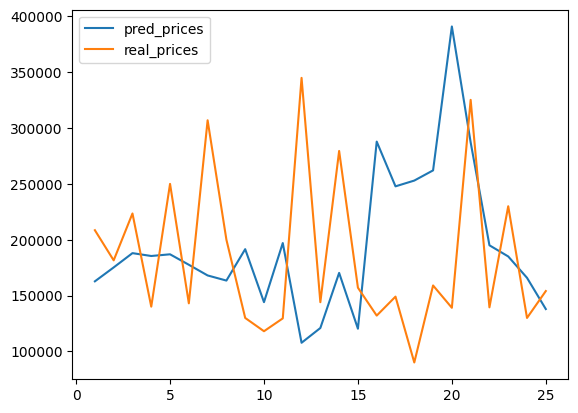

In [77]:
plt.plot(X_num, pred_prices, label = 'pred_prices')
plt.plot(X_num, real_prices, label = 'real_prices')
plt.legend()
plt.show()
